# 1.0 Getting started

## 1.1 Package installation

In [1]:
# Pkg.add("PhyloTrees")

## 1.2 Loading of package

In [2]:
using PhyloTrees



# 2.0 Tree construction

## 2.1 Tree initialization

In [3]:
# Initializes a tree with a single node
tree_demo1 = Tree()

Phylogenetic tree with 1 nodes and 0 branches

In [4]:
# Initializes a tree with a specified number of nodes
tree_demo2 = Tree(3)

Phylogenetic tree with 3 nodes and 0 branches

## 2.2 Nodes

In [5]:
# Adds a single node to a tree
addnode!(tree_demo1)

Phylogenetic tree with 2 nodes and 0 branches

In [6]:
# Adds a specified number of nodes to a tree
addnodes!(tree_demo2, 5)

Phylogenetic tree with 8 nodes and 0 branches

In [7]:
# Access or views the nodes of a tree
tree_demo1.nodes

2-element Array{PhyloTrees.Node,1}:
 
 

## 2.3 Branches

In [8]:
# Adds a branch between a source and target node, of a specified length to a tree
addbranch!(tree_demo1, 1, 2, 10.0)

Phylogenetic tree with 2 nodes and 1 branches

In [9]:
# Attaches a branch of a specified length to a source node, which terminates to a new node
branch!(tree_demo1, 1, 5.0)

Phylogenetic tree with 3 nodes and 2 branches

In [10]:
# Access or view the `branches` contained within a tree`
tree_demo1.branches

2-element Array{PhyloTrees.Branch,1}:
[node 1]-->[10.0 branch]-->[node 2]
[node 1]-->[5.0 branch]-->[node 3] 

## 2.4 Subtrees

In [11]:
# Extracts the subtree from a specified node in an exisiting tree
subtree_demo1 = subtree(tree_demo1, 1)

Phylogenetic tree with 3 nodes and 2 branches

In [12]:
# Adds a subtree to an existing tree
addsubtree!(tree_demo1, subtree_demo1)

# Adds a branch of a specified length connecting the newly added subtree
addbranch!(tree_demo1, 2, 4, 17.0)

Phylogenetic tree with 6 nodes and 5 branches

# 3.0 Utilities

## 3.1 Node types

In [13]:
# Determines if a node is a root, leaf, or internal node respectively
[isroot(tree_demo1, 1), 
 isleaf(tree_demo1, 1),
 isnode(tree_demo1, 1)]

3-element Array{Bool,1}:
  true
 false
 false

In [14]:
# Returns the type of node (root node, leaf node, or internal node)
nodetype(tree_demo1, 1)

"Root"

In [15]:
# Determine which nodes are roots, leaves, or internal nodes respectively
println("Roots: $(findroots(tree_demo1))")
println("Leaves: $(findleaves(tree_demo1))")
println("Nodes: $(findnodes(tree_demo1))")


Roots: [1]
Leaves: [3,5,6]
Nodes: [2,4]


In [16]:
# Calculates the branch distance between any two nodes on a tree
distance(tree_demo1, 2, 3)

15.0

## 3.2 Node relationships

In [17]:
# Determines if two nodes are connected either directly or indirectly
areconnected(tree_demo1, 1, 2)

true

In [18]:
# If two nodes are connected, determines the "node path" which connects them
nodepath(tree_demo1, 1, 2)

2-element Array{Int64,1}:
 1
 2

In [19]:
# If two nodes are connected, determines the "branch path" which connects them
branchpath(tree_demo1, 1, 2)

1-element Array{Any,1}:
 1

In [20]:
# Lists the parent node associated with a specified node
parentnode(tree_demo1, 2)

1

In [21]:
# Lists all the ancestor nodes associated with a specified node
ancestornodes(tree_demo1, 2)

1-element Array{Int64,1}:
 1

In [22]:
# Lists the number of ancestors a specified node has
ancestorcount(tree_demo1, 2)

1

In [23]:
# Lists all the child nodes associated with a specified node
childnodes(tree_demo1, 1)

2-element Array{Int64,1}:
 2
 3

In [24]:
# Lists all the descendant nodes associated with a specified node
descendantnodes(tree_demo1, 1)

5-element Array{Int64,1}:
 2
 3
 4
 5
 6

In [25]:
# Lists the number of descendants a specified node has
descendantcount(tree_demo1, 1)

5

# 4.0 Plotting


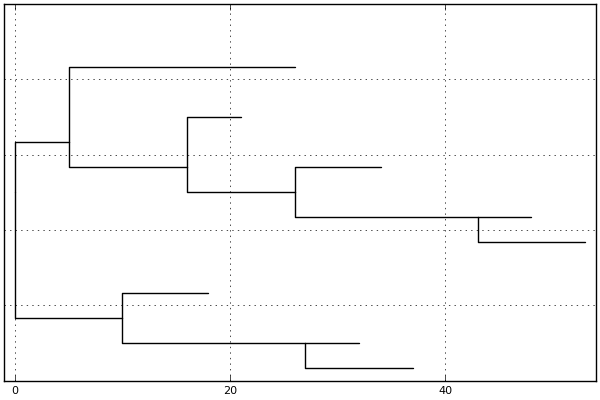

In [26]:
# We'll increase tree complexity a bit first...
branch!(tree_demo1, 2, 8.0)
addsubtree!(tree_demo1, subtree(tree_demo1, 1))
addbranch!(tree_demo1, 3, 8, 11.0)
branch!(tree_demo1, 3, 21.0)

# Plots the tree
using Plots
pyplot()
plot(tree_demo1)

# 5.0 Simulation

In [27]:
tree_demo1.nodes

15-element Array{PhyloTrees.Node,1}:
[root node]-->[branch 1]
           -->[branch 2]                                    
[branch 1]-->[internal node]-->[branch 5]
                            -->[branch 6]  
[branch 2]-->[internal node]-->[branch 13]
                            -->[branch 14]
[branch 5]-->[internal node]-->[branch 3]
                            -->[branch 4]  
[branch 3]-->[leaf node]                                                                 
[branch 4]-->[leaf node]                                                                 
[branch 6]-->[leaf node]                                                                 
[branch 13]-->[internal node]-->[branch 7]
                             -->[branch 8]
[branch 7]-->[internal node]-->[branch 9]
                            -->[branch 10] 
[branch 8]-->[leaf node]                                                                 
[branch 9]-->[internal node]-->[branch 11]
                            -->[branch 12]
[

## 5.1 Substitution models

In [28]:
# Generates the relative rate formulation of the JC69 substitution model 
JC69_demo = JC69()

# See PhyloTrees/src/substitution_models/ for several additional substitution models

Jukes and Cantor 1969 substitution model

[-3.0 1.0 1.0 1.0; 1.0 -3.0 1.0 1.0; 1.0 1.0 -3.0 1.0; 1.0 1.0 1.0 -3.0]

## 5.2 DNA sequence generation

In [29]:
# Generates DNA sequence data for nodes of a tree.
seqdemo = simulate(tree_demo1, JC69_demo, 1000)

# The root sequence may be specified or generated.

# Site rates may be constant or variable. 

15-element Array{PhyloTrees.Sequence,1}:
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA
 AAACGGAGTTCAA...GCTAGACAAGTACA